# Survivorship Bias and the Randomness of Success

## Simulation 1

In this simulation, we explore survivorship bias, a common cognitive pitfall where conclusions are drawn by studying only the “survivors” (i.e., successful cases) while ignoring those that failed or did not survive. By focusing solely on those who succeed, one often overestimates the significance of their traits or behaviors, erroneously attributing success to them. In reality, many individuals with the same traits may have failed for reasons unrelated to those traits—or simply due to randomness. To illustrate this, we consider a large population (100,000 individuals) in which each individual has four dichotomous traits (e.g., Introvert vs. Extrovert). We then assign “success” purely by chance, with a varying probability from 5% down to 0.001%, thereby simulating scenarios in which success becomes increasingly rare.

Across 100 iterations, the simulation calculates the overall prevalence of each trait in the entire population and compares it to the prevalence among the subset of successful individuals. By plotting the difference between these two prevalence rates over different success probabilities, we can see how random fluctuations in smaller “successful” groups can make traits appear strongly correlated with success—even when success is entirely random. Thus, the methodology underscores how survivorship bias can mislead us into inferring cause-and-effect relationships based on incomplete data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def simulate_survivorship_bias(num_individuals=10000, success_prob=0.1, random_seed=None):
    """
    Simulate a population with four random dichotomous traits.
    Assign success randomly with probability `success_prob`.
    Return the overall trait distribution and the distribution among successful individuals.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Four traits that ~50% of the population might have:
    #  1) Is an introvert (vs. extrovert)
    #  2) Exercises regularly (vs. not)
    #  3) Drinks coffee (vs. not)
    #  4) Prefers reading over watching TV (vs. not)
    trait_names = ["Introvert", "ExercisesRegularly", "CoffeeDrinker", "PrefersReading"]
    
    # Generate random traits (Bernoulli(0.5) = 50% chance)
    traits = np.random.randint(0, 2, size=(num_individuals, 4))
    
    # Convert to DataFrame
    df = pd.DataFrame(traits, columns=trait_names)
    
    # Assign success randomly (Bernoulli(success_prob))
    df["Success"] = np.random.rand(num_individuals) < success_prob
    
    # Distribution of traits in the entire population
    overall_distribution = df[trait_names].mean()
    
    # Distribution of traits among the successful subset
    df_success = df[df["Success"]]
    if len(df_success) > 0:
        success_distribution = df_success[trait_names].mean()
    else:
        # If no one succeeds (e.g., if success_prob is very small), set to NaN
        success_distribution = pd.Series([np.nan] * len(trait_names), index=trait_names)
    
    return overall_distribution, success_distribution


In [21]:
# Run the simulation
def main():
    num_individuals = 100000
    
    # Vary success_prob from 5% (0.05) down to 0.001% (0.00001) over 100 simulations
    success_prob_values = np.linspace(0.05, 0.00001, 100)
    
    # Track differences for each trait
    trait_names = ["Introvert", "ExercisesRegularly", "CoffeeDrinker", "PrefersReading"]
    differences = {trait: [] for trait in trait_names}
    
    for i, p in enumerate(success_prob_values):
        overall_dist, success_dist = simulate_survivorship_bias(
            num_individuals=num_individuals, 
            success_prob=p, 
            random_seed=42 + i
        )
        
        # Calculate the difference for each trait
        for trait in trait_names:
            diff = success_dist[trait] - overall_dist[trait]
            differences[trait].append(diff)
    
    # --- Visualization: Each trait on its own panel ---
    fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing
    
    for idx, trait in enumerate(trait_names):
        ax = axes[idx]
        ax.plot(success_prob_values, differences[trait], label=trait, color="C{}".format(idx))
        ax.set_title(trait)
        ax.set_xlabel("Success Probability")
        ax.set_ylabel("Diff: Success - Overall")
        ax.grid(True)
        # Optionally invert the x-axis so that 0.1 -> 0.001 goes left to right
        ax.invert_xaxis()
    
    plt.tight_layout()
    plt.show()



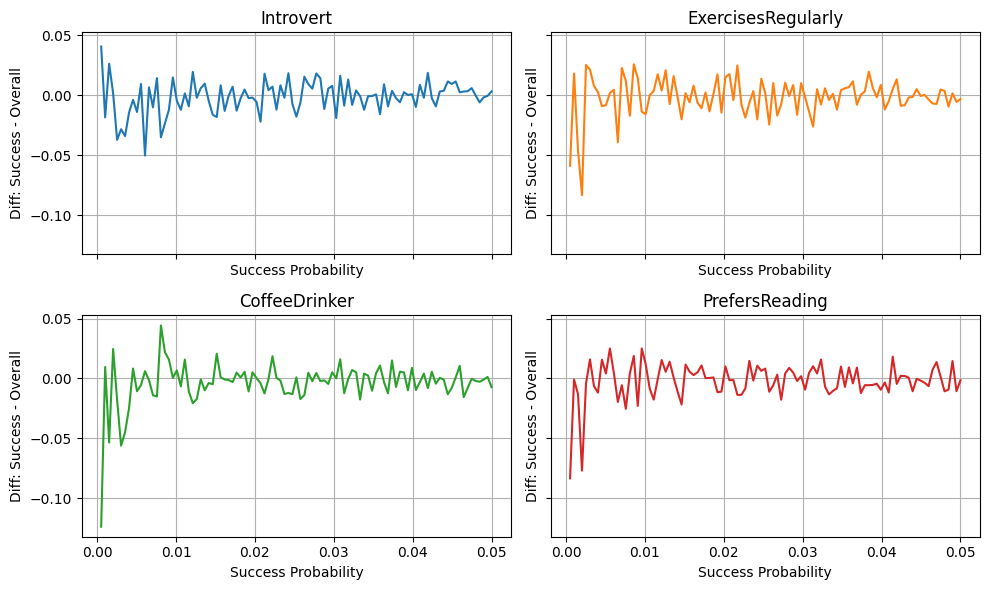

In [22]:
main()

From the figure above, we can see that for each trait (Introvert, ExercisesRegularly, CoffeeDrinker, PrefersReading), the difference between its prevalence in the successful subset and in the overall population hovers around zero but exhibits random fluctuations—sometimes dipping below zero, sometimes rising above. However, as the probability of success in the population drops below 1%, the difference between the prevalence of traits in the successful subset and total population widens considerably. In other words, when success is assigned purely at random, the traits occasionally appear more (or less) common among the “survivors” (i.e., successful people), and these deviations may become considerably larger as the probability of success drops. This highlights how, if one only looked at the extremely successful group without considering the entire population, one might be misled into believing that certain traits are strongly associated with success when in fact the observed differences might simply be due to chance.